In [1]:
from Tools import * 
import pandas as pd

In [2]:

def fit_pyoptmec(Y_t_red,Y_t_det,time_det,Y_nt_red,Y_nt_det,temp_red,temp_det,ai_det,ai_red,case) : 
    F1_m =[]
    F2_m =[]
    F3_m =[] 
    F4_m = []
    for c in range(len(case)) : 
        # Equation F1_m
        top1 = np.trapezoid(np.abs(np.array(Y_t_red[c]) - np.array(Y_t_det[c])), np.array(time_det[c]))
        bot1 = np.trapezoid(np.abs(np.array(Y_t_det[c])), np.array(time_det[c]))
        F1_m.append( (top1/bot1)**2)

        # Equation F2_m
        top2 = [(np.max(Y_nt_red[c],axis=1)[j] - np.max(Y_nt_det[c],axis=1)[j]) for j in range(len(np.max(Y_nt_det[c],axis=1))) ]
        bot2 = [np.max(Y_nt_det[c],axis=1)[j] for j in range(len(np.max(Y_nt_det[c],axis=1))) ]
    
        F2_m.append((np.array(top2)/np.array(bot2))**2)

        # Equation F3_m
        top3 = np.trapezoid(np.abs(temp_red[c] - temp_det[c]), time_det[c])
        bot3 = np.trapezoid(np.abs(temp_det[c]), time_det[c])
        F3_m .append(( top3/ bot3)**2)

        # Equation F4_m
        top4 = (ai_red[c] - ai_det[c])
        bot4= ai_det[c]
        F4_m.append((top4/bot4)**2)
        
    weight = [1,1,1,1]
    # print(f"F1 = {F1_m}")
    # print(f"F2 = {F2_m}")
    
    _err = (
                weight[0] * np.sum(F1_m)
                + weight[1] * np.sum(F2_m)
                + weight[2] * F3_m
                + weight[3] * F4_m
            )
    # print(f"Err : {_err}")

    err = np.sqrt(np.sum(_err))
    print(np.sqrt(np.sum(_err)))
    return err,F1_m,F2_m,F3_m,F4_m

In [3]:
Detailed_gas = ct.Solution("detailed.yaml")
Reduced_gas = ct.Solution("reduced.yaml")
Optim_1 = ct.Solution("STEC_A.yaml")
Optim_100 = ct.Solution("STEC_B.yaml")

Targets = ["H2", "NH3", "O2", "OH","NO", 'H2O','NO2', 'N2O','N2']
Non_Target = ['H', 'O', 'HO2', 'N', 'N2H2', 'HNO',"NH","NH2","NNH"]
idx_target_det = spcs_name_idx(Detailed_gas,Targets)
idx_target_red = spcs_name_idx(Reduced_gas,Targets)
idx_target_optim1 = spcs_name_idx(Optim_1,Targets)
idx_target_optim100 = spcs_name_idx(Optim_100,Targets)

idx_non_target_det = spcs_name_idx(Detailed_gas,Non_Target)
idx_non_target_red = spcs_name_idx(Reduced_gas,Non_Target)
idx_non_target_optim1 = spcs_name_idx(Optim_1,Non_Target)
idx_non_target_optim100 = spcs_name_idx(Optim_100,Non_Target)

pressure = np.linspace(1,1,1).tolist()
temperature = np.linspace(1000,2000,11).tolist()
phi = np.round(np.linspace(0.5, 2.0, 8), 1).tolist()
mixture =np.linspace(0.85,0.85,1).tolist()
case = generate_test_cases_bifuel(temperature,pressure,phi,mixture)


/tmp/ipykernel_147996/1414895828.py:1: UserWarning: NasaPoly2::validate: 
For species OHV, discontinuity in h/RT detected at Tmid = 1000
	Value computed using low-temperature polynomial:  53.62056162666667
	Value computed using high-temperature polynomial: 53.5841554314

  Detailed_gas = ct.Solution("detailed.yaml")


In [4]:
Time_det = pd.read_pickle("Time_det.pkl")
Temp_det = pd.read_pickle("Temp_det.pkl")
Y_Target_det = pd.read_pickle("Y_Target_det.pkl")
Y_Non_Target_det = pd.read_pickle("Y_Non_target_det.pkl")
AI_delay_det = pd.read_pickle("AI_det.pkl")

Time_red = pd.read_pickle("Time_red.pkl")
Temp_red = pd.read_pickle("Temp_red.pkl")
Y_Target_red = pd.read_pickle("Y_Target_red.pkl")
Y_Non_Target_red = pd.read_pickle("Y_Non_target_red.pkl")
AI_delay_red = pd.read_pickle("AI_red.pkl")

Time_red_optim1 = pd.read_pickle("Time_red_optim1.pkl")
Temp_red_optim1 = pd.read_pickle("Temp_red_optim1.pkl")
Y_Target_red_optim1 = pd.read_pickle("Y_Target_red_optim1.pkl")
Y_Non_Target_red_optim1 = pd.read_pickle("Y_Non_target_red_optim1.pkl")
AI_delay_red_optim1 = pd.read_pickle("AI_red_optim1.pkl")

Time_red_optim2 = pd.read_pickle("Time_red_optim2.pkl")
Temp_red_optim2 = pd.read_pickle("Temp_red_optim2.pkl")
Y_Target_red_optim2 = pd.read_pickle("Y_Target_red_optim2.pkl")
Y_Non_Target_red_optim2 = pd.read_pickle("Y_Non_target_red_optim2.pkl")
AI_delay_red_optim2 = pd.read_pickle("AI_red_optim2.pkl")

Err,F1,F2,F3,F4 = fit_pyoptmec(Y_Target_red,Y_Target_det,Time_det,Y_Non_Target_red,Y_Non_Target_det,Temp_red,Temp_det,AI_delay_det,AI_delay_red,case)
Err_1 ,F1_1,F2_1,F3_1,F4_1 = fit_pyoptmec(Y_Target_red_optim1,Y_Target_det,Time_det,Y_Non_Target_red_optim1,Y_Non_Target_det,Temp_red_optim1,Temp_det,AI_delay_det,AI_delay_red_optim1,case)
Err_100 ,F1_100,F2_100,F3_100,F4_100 = fit_pyoptmec(Y_Target_red_optim2,Y_Target_det,Time_det,Y_Non_Target_red_optim2,Y_Non_Target_det,Temp_red_optim2,Temp_det,AI_delay_det,AI_delay_red_optim2,case)


209436738.6417863
1885544.488061538
526.1297520446902


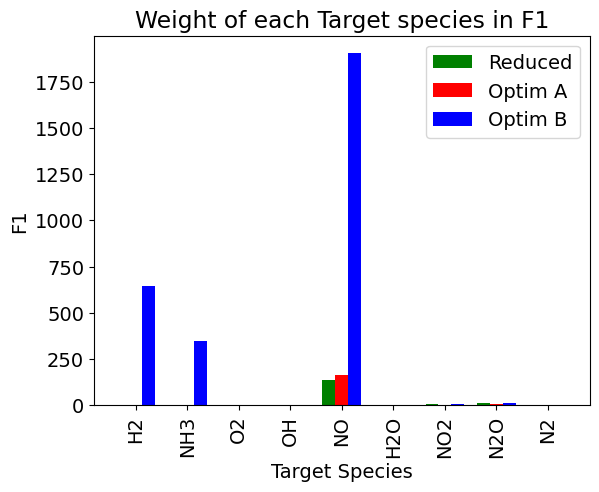

In [5]:
plt.rcParams.update({'font.size': 14}) 
# Assuming F1, F1_1, and F1_100 are lists of numpy arrays and Targets is a list of target names
hist1 = np.sum(F1,axis=0)
hist2 = np.sum(F1_1,axis=0)
hist3 = np.sum(F1_100,axis=0)

# Set the width of the bars
width = 0.25

# Create the bars for each dataset, with slight offset for each
plt.bar(np.arange(len(Targets)) - width, hist1, width=width, label="Reduced",color ="g")
plt.bar(np.arange(len(Targets)), hist2, width=width, label="Optim A",color = "r")
plt.bar(np.arange(len(Targets)) + width, hist3, width=width, label="Optim B",color ="b")

# Set the x-ticks to the target names
plt.xticks(np.arange(len(Targets)), Targets, rotation=90)

# Set log scale for the y-axis
# Add labels and title
plt.xlabel("Target Species")
plt.ylabel("F1")
plt.title("Weight of each Target species in F1")

# Add a legend
plt.legend()
# Show the plot
plt.savefig("F1.png")
plt.show()


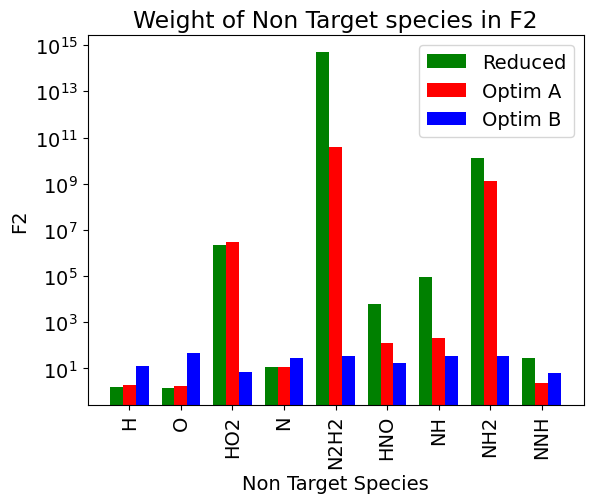

In [6]:
plt.rcParams.update({'font.size': 14}) 
# Assuming F1, F1_1, and F1_100 are lists of numpy arrays and Targets is a list of target names
hist1 = np.sum(F2,axis=0)
hist2 = np.sum(F2_1,axis=0)
hist3 = np.sum(F2_100,axis=0)

# Set the width of the bars
width = 0.25

# Create the bars for each dataset, with slight offset for each
plt.bar(np.arange(len(Non_Target)) - width, hist1, width=width, label="Reduced",color ="g")
plt.bar(np.arange(len(Non_Target)), hist2, width=width, label="Optim A",color = "r")
plt.bar(np.arange(len(Non_Target)) + width, hist3, width=width, label="Optim B",color ="b")

# Set the x-ticks to the target names
plt.xticks(np.arange(len(Non_Target)), Non_Target, rotation=90)

# Set log scale for the y-axis
# Add labels and title
plt.xlabel("Non Target Species")
plt.ylabel("F2")
plt.title("Weight of Non Target species in F2")

# Add a legend
plt.legend()
plt.yscale("log")
plt.savefig("F2.png")
# Show the plot
plt.show()


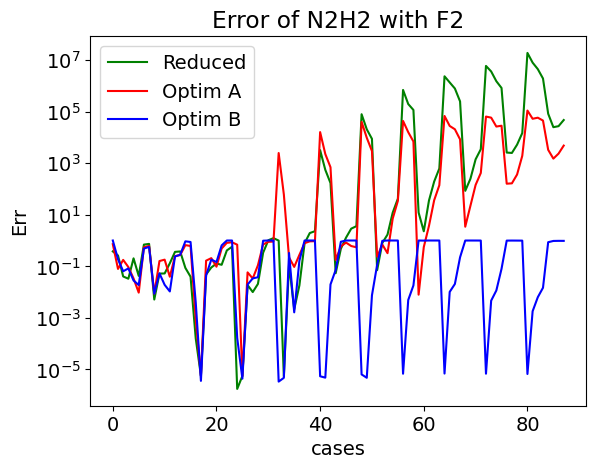

In [7]:
Max_N2H2_det = []
Max_N2H2_red = []
Max_N2H2_optim1=[]
Max_N2H2_optim2 =[]
for c in range(len(case)) : 
    Max_N2H2_det.append(np.max(Y_Non_Target_det[c][4]))
    Max_N2H2_red.append(np.max(Y_Non_Target_red[c][4]))
    Max_N2H2_optim1.append(np.max(Y_Non_Target_red_optim1[c][4]))
    Max_N2H2_optim2.append(np.max(Y_Non_Target_red_optim2[c][4]))
plt.plot(np.abs(np.array(Max_N2H2_det)-np.array(Max_N2H2_red))/np.array(Max_N2H2_det),'g',label="Reduced")
plt.plot(np.abs(np.array(Max_N2H2_det)-np.array(Max_N2H2_optim1))/np.array(Max_N2H2_det),'r',label="Optim A")
plt.plot(np.abs(np.array(Max_N2H2_det)-np.array(Max_N2H2_optim2))/np.array(Max_N2H2_det),'b',label="Optim B")
plt.xlabel("cases")
plt.ylabel("Err")
plt.legend()
plt.title("Error of N2H2 with F2")
plt.yscale("log")
plt.savefig("Err_N2H2_MAX.png")

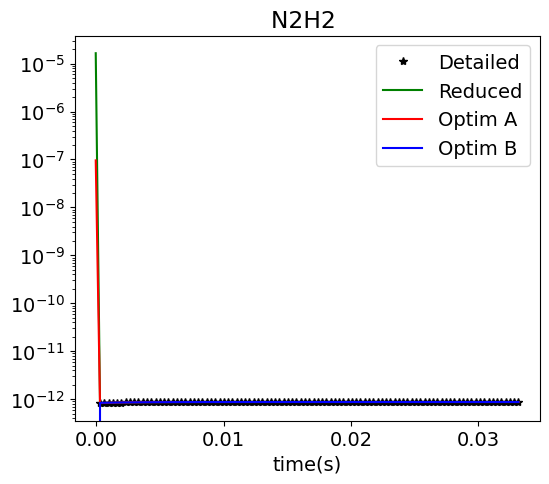

In [15]:
case_ind = 80
plt.figure(figsize=(6, 5))
plt.plot(Time_det[case_ind],Y_Non_Target_det[case_ind][4],'k*',label="Detailed")
plt.plot(Time_det[case_ind],Y_Non_Target_red[case_ind][4],'g',label="Reduced")
plt.plot(Time_det[case_ind],Y_Non_Target_red_optim1[case_ind][4],'r',label="Optim A")
plt.plot(Time_det[case_ind],Y_Non_Target_red_optim2[case_ind][4],'b',label="Optim B")
plt.yscale("log")
plt.legend()
plt.title("N2H2 ")
plt.xlabel("time(s)")
plt.savefig("N2H2_temporal.png")